<a href="https://colab.research.google.com/github/TristanDelgado/Intro-To-Machine-Learning/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning CS-4410-XTIA Homework 4

##Instructions

###Ex 15.17 Binary Classification with the Breast Cancer Dataset on page 661.


Your program needs to have the following:



*   Loading the Dataset
*   Checking the Sample and Target Sizes
*   Splitting the Data for Training and Testing
*   Training and Testing Set Sizes
*   Creating the Model (GaussianNB)
*   Training the Model
*   Predicting
*   Estimator Method score
*   Confusion Matrix
*   Classification Report
*   Visualizing the Confusion Matrix
*   K-Fold Cross-Validation
*   Using the KFold Object with Function cross_val_score:
```
     from sklearn.model_selection import KFold
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)

     from sklearn.model_selection import cross_val_score
     scores = cross_val_score(estimator=nb, X=breast_cancer.data,
          y=breast_cancer.target, cv=kfold)
```
*   Running Multiple Models to Find the Best One:   
```
estimators = 'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
```

##Solutions

In [86]:
#Loading the Dataset
from sklearn.datasets import load_breast_cancer
bcData = load_breast_cancer()

In [87]:
#Check the Sample and Target sizes
#print(bcData.data.shape)
#print(bcData.target.shape)
#print(bcData.DESCR)

In [88]:
#Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bcData.data, bcData.target, test_size=0.2, random_state=42)

In [89]:
#Training and Testing Set Sizes
#Not sure what to do here

In [90]:
#Creating the Model (GaussianNB)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [91]:
#Training the Model
model.fit(X_train, y_train)

GaussianNB()

In [92]:
#Predicting
pred = model.predict(X_test)

In [93]:
#Estimator Method score
accuracy = model.score(X_test, y_test)
print(f"The accuracy score of the GaussianNB model is: {accuracy}")

The accuracy score of the GaussianNB model is: 0.9736842105263158


Text(0.5, 1.0, 'Confusion Matrix')

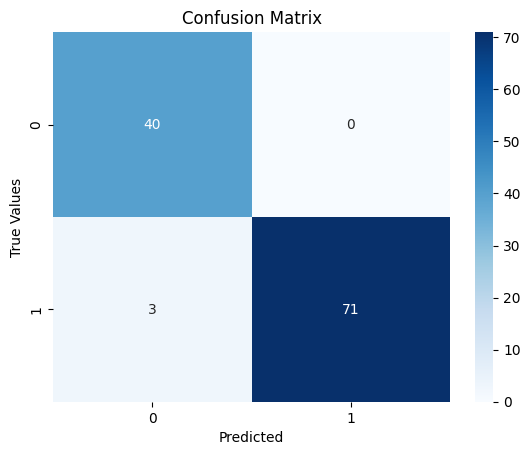

In [94]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_test)

#Visualizing the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True Values")
plt.title("Confusion Matrix")

In [95]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=bcData.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [96]:
#K-Fold Cross-Validation
#Using the KFold Object with Function cross_val_score:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model, X=bcData.data,
                         y=bcData.target, cv=kfold)
print(scores)

[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]


In [97]:
#Running Multiple Models to Find the Best One:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
estimators = {'GaussianNB': model, 'KNeighborsClassifier': KNeighborsClassifier(), 'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),'SVC': SVC(gamma='scale')}
for name, estimator in estimators.items():
  scores = cross_val_score(estimator = estimator, X=bcData.data, y=bcData.target, cv=kfold, scoring="r2")
  print(f'{name:>20}: ' + f'mean of r2 scores = {scores.mean():.3f}')

          GaussianNB: mean of r2 scores = 0.736
KNeighborsClassifier: mean of r2 scores = 0.689
  LogisticRegression: mean of r2 scores = 0.791
                 SVC: mean of r2 scores = 0.655
